# Homework PCA

## Subtask 1


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### • Plot the first 3 columns of the Data Set and the target column in a 3d scatter plot

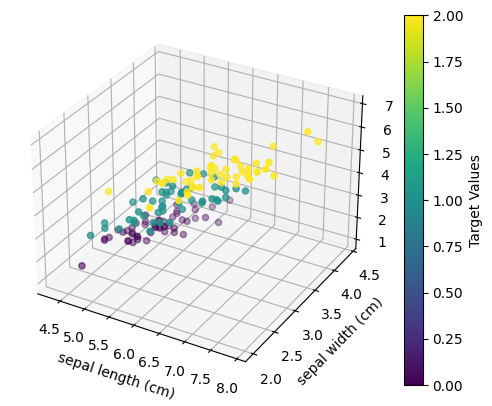

In [50]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values

# Extract the target column as colors
colors = df['target'].values

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points using the first 3 columns as coordinates and colors based on the target column
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

# Add a colorbar to indicate the mapping from colors to target values
cbar = plt.colorbar(scatter)
cbar.set_label('Target Values')

# Show the 3D scatter plot
plt.show()

### Copy the implementation of the Principal Component Analysis algorithm from SMLH.

In [51]:
import numpy as np

class myPCA:
    def __init__(self, n_components: int = 2, method: str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        
        :param n_components: int, default=2
            The dimension to which the data will be reduced.
        :param method: str, default='svd'
            The method used by PCA to reduce the dimensionality of the data.
        '''
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")

    def fit(self, X: np.array):
        '''
        The fitting method.
        
        :param X: np.array
            The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the explained variance ratio
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i / total) * 100 for i in sorted(self.eig_vals, reverse=True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            
            # Creating the projection matrix
            self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.__n_components)))

        return self

    def transform(self, X: np.array) -> np.array:
        '''
        The transform function.
        
        :param X: np.array
            The data that we must reduce.
        '''
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)


### Create an instance of the Scratch-made PCA algorithm using the eigenvector algorithm.

In [79]:
X=pd.DataFrame(data.data)
y=pd.DataFrame(data.target)



In [80]:
pca = myPCA(n_components=2, method='eigen')
# Fit the PCA model to your data
pca.fit(X)

# Transform your data using the fitted PCA model
X_transformed = pca.transform(X)

C:\Users\prodi\AppData\Local\Temp\ipykernel_21180\1245848674.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.__n_components)))


# Subtask 2

In [73]:
df=pd.read_csv('test.csv')
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#####  Second plot in a multiple window plot 10 random digits with a titlehaving the digit from the image on a 2 x 5 grid.

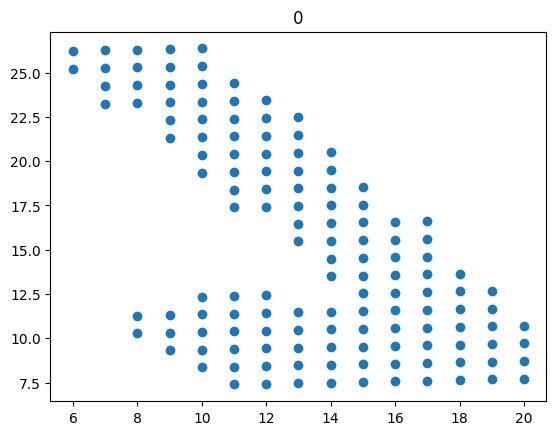

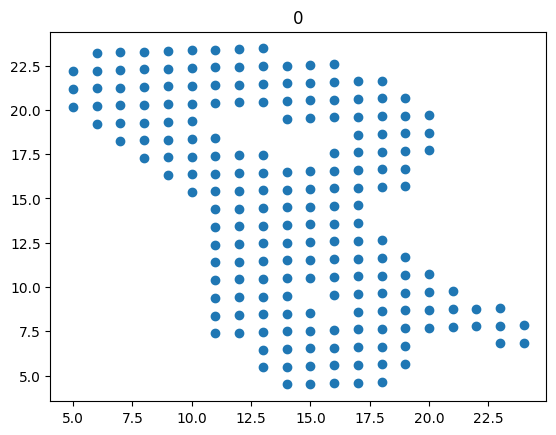

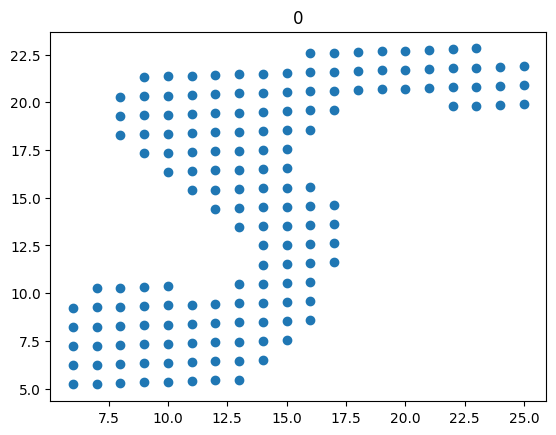

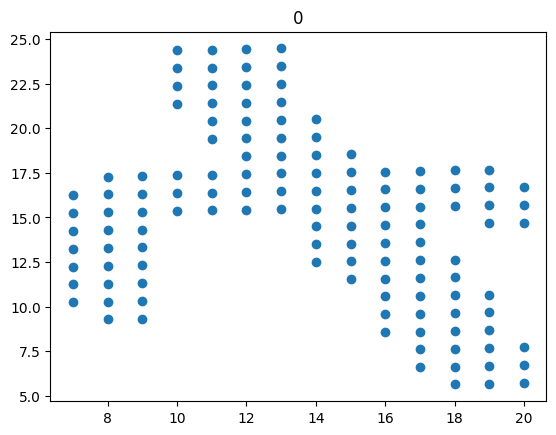

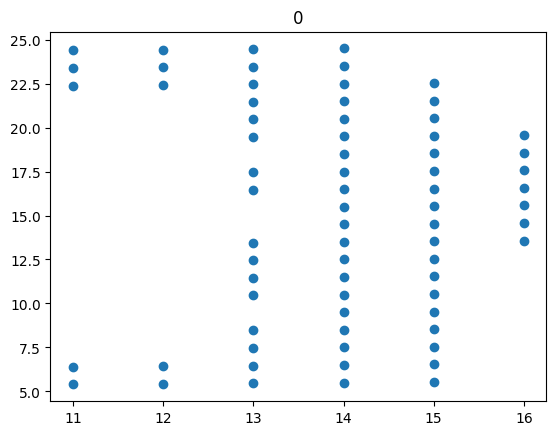

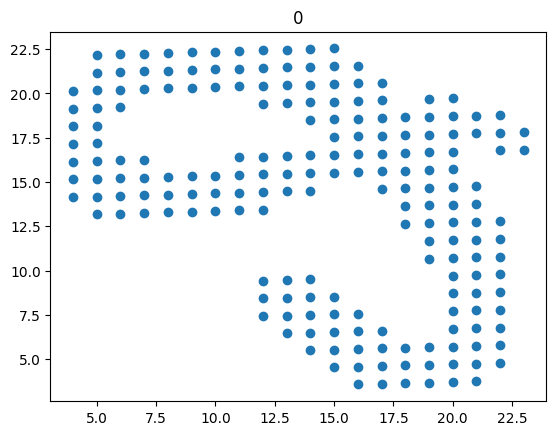

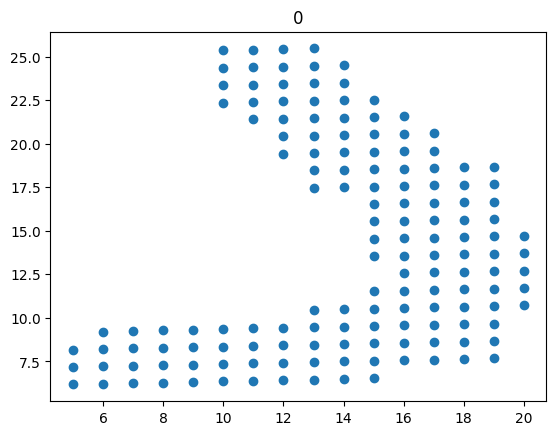

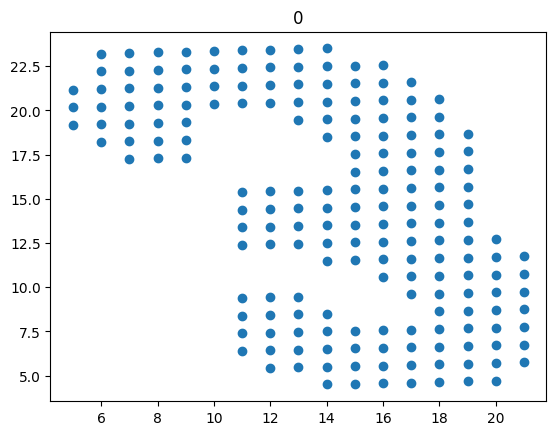

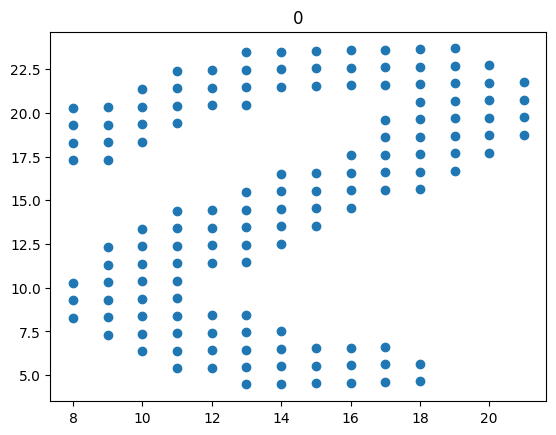

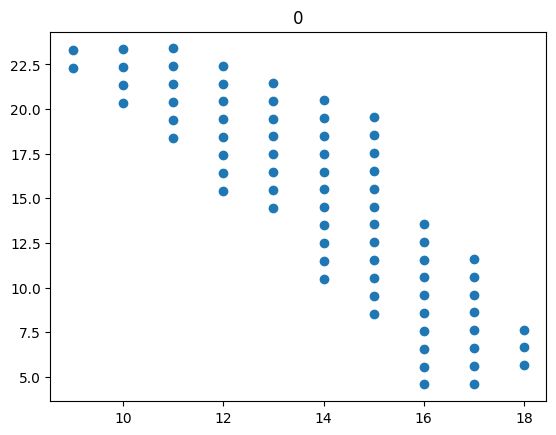

In [77]:
for i in range(10):
  x = []
  y = []
  random_num = np.random.randint(0, 28000)
  for j in range(1, len(df.iloc[random_num])):
    if df.iloc[random_num][j] != 0:
      x.append(j%28)
      y.append(j/28)
  plt.scatter(x, y)
  plt.title(str(df.iloc[random_num][0]))

  plt.show()